<a href="https://colab.research.google.com/github/SamuellH12/Sorting_Hat_AI/blob/main/IAteste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#primeiro fazer upload das credenciais do kaggle
! pip install kaggle
! echo '{"username":"samuellh12","key":"95ed04950bdc1687c389f489e2f1ebd8"}' > kaggle.json #credencial
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download tunguz/big-five-personality-test
! unzip big-five-personality-test.zip

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
big-five-personality-test.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  big-five-personality-test.zip
replace IPIP-FFM-data-8Nov2018/.directory? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace IPIP-FFM-data-8Nov2018/codebook.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace IPIP-FFM-data-8Nov2018/data-final.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
big5 = pd.read_csv('IPIP-FFM-data-8Nov2018/data-final.csv', delimiter='\t')

big5 = big5[ ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'] ]
big5.fillna(3, inplace=True)
big5 = big5.astype(int)

big5

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,1,5,2,5,1,5,2,4,1,...,5,1,4,1,4,1,5,3,4,5
1,3,5,3,4,3,3,2,5,1,5,...,1,2,4,2,3,1,4,2,5,3
2,2,3,4,4,3,2,1,3,2,5,...,5,1,2,1,4,2,5,3,4,4
3,2,2,2,3,4,2,2,4,1,4,...,4,2,5,2,3,1,4,4,3,3
4,3,3,3,3,5,3,3,5,3,4,...,5,1,5,1,5,1,5,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4,2,4,3,4,3,3,3,3,3,...,2,2,4,3,4,2,4,2,2,4
1015337,4,3,4,3,3,3,4,4,3,3,...,4,1,5,1,5,1,3,4,5,4
1015338,4,2,4,3,5,1,4,2,4,4,...,5,1,5,1,4,1,5,5,4,5
1015339,2,4,3,4,2,2,1,4,2,4,...,5,2,4,2,3,2,4,5,5,3


#Features Description // Descrição das Características
**EXT** - Surgency or Extraversion // Extroversão       <br>
**EST** - Emotional Stability // Estabilidade Emocional <br>
**AGR** - Agreeableness // Amabilidade e cooperação     <br>
**CSN** - Conscientiousness // "Organização"            <br>
**OPN** - Openness to Experience // Intelecto ou Imaginação

**EXT** introvert <---> extrovert    <br>
**EST** stable <------> neurotic     <br>
**AGR** hostile <-----> agreeable    <br>
**CSN** spontaneus <--> concientious <br>
**OPN** closed <---> open




In [ ]:
#give the negative weigths
big5[['EXT2', 'EXT4', 'EXT6', 'EXT8','EXT10', 
      'EST1', 'EST3', 'EST5', 'EST6', 'EST7',
      'EST8', 'EST9', 'EST10','AGR1', 'AGR3', 
      'AGR5', 'AGR7', 'CSN2', 'CSN4', 'CSN6',
      'CSN8', 'OPN2', 'OPN4', 'OPN6']] *= -1

big5

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,-1,5,-2,5,-1,5,-2,4,-1,...,5,-1,4,-1,4,-1,5,3,4,5
1,3,-5,3,-4,3,-3,2,-5,1,-5,...,1,-2,4,-2,3,-1,4,2,5,3
2,2,-3,4,-4,3,-2,1,-3,2,-5,...,5,-1,2,-1,4,-2,5,3,4,4
3,2,-2,2,-3,4,-2,2,-4,1,-4,...,4,-2,5,-2,3,-1,4,4,3,3
4,3,-3,3,-3,5,-3,3,-5,3,-4,...,5,-1,5,-1,5,-1,5,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4,-2,4,-3,4,-3,3,-3,3,-3,...,2,-2,4,-3,4,-2,4,2,2,4
1015337,4,-3,4,-3,3,-3,4,-4,3,-3,...,4,-1,5,-1,5,-1,3,4,5,4
1015338,4,-2,4,-3,5,-1,4,-2,4,-4,...,5,-1,5,-1,4,-1,5,5,4,5
1015339,2,-4,3,-4,2,-2,1,-4,2,-4,...,5,-2,4,-2,3,-2,4,5,5,3


In [ ]:

################################################################
# KMEANS COM TODAS AS CARACTERÍSTICAS (PONTUAÇÕES INDIVIDUAIS) #
################################################################

kmeansOBJ = KMeans(4)

clusters = kmeansOBJ.fit_predict(big5)

#tempo médio: 46s

In [ ]:
kmeansCentroids = kmeansOBJ.fit(big5)

In [ ]:
x = pd.DataFrame(clusters)
x.rename(columns={0:"Casa"}, inplace=True)

fusion = pd.concat([big5, x], axis=1)

fusion

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Casa
0,4,-1,5,-2,5,-1,5,-2,4,-1,...,-1,4,-1,4,-1,5,3,4,5,3
1,3,-5,3,-4,3,-3,2,-5,1,-5,...,-2,4,-2,3,-1,4,2,5,3,0
2,2,-3,4,-4,3,-2,1,-3,2,-5,...,-1,2,-1,4,-2,5,3,4,4,0
3,2,-2,2,-3,4,-2,2,-4,1,-4,...,-2,5,-2,3,-1,4,4,3,3,0
4,3,-3,3,-3,5,-3,3,-5,3,-4,...,-1,5,-1,5,-1,5,3,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4,-2,4,-3,4,-3,3,-3,3,-3,...,-2,4,-3,4,-2,4,2,2,4,1
1015337,4,-3,4,-3,3,-3,4,-4,3,-3,...,-1,5,-1,5,-1,3,4,5,4,1
1015338,4,-2,4,-3,5,-1,4,-2,4,-4,...,-1,5,-1,4,-1,5,5,4,5,1
1015339,2,-4,3,-4,2,-2,1,-4,2,-4,...,-2,4,-2,3,-2,4,5,5,3,2


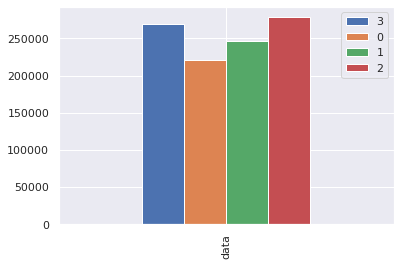

In [ ]:
from collections import Counter

pd.DataFrame( Counter(fusion['Casa']), index=['data']).plot(kind='bar')

plt.show()
#K-means gera uma boa distribuição geral entre as classes

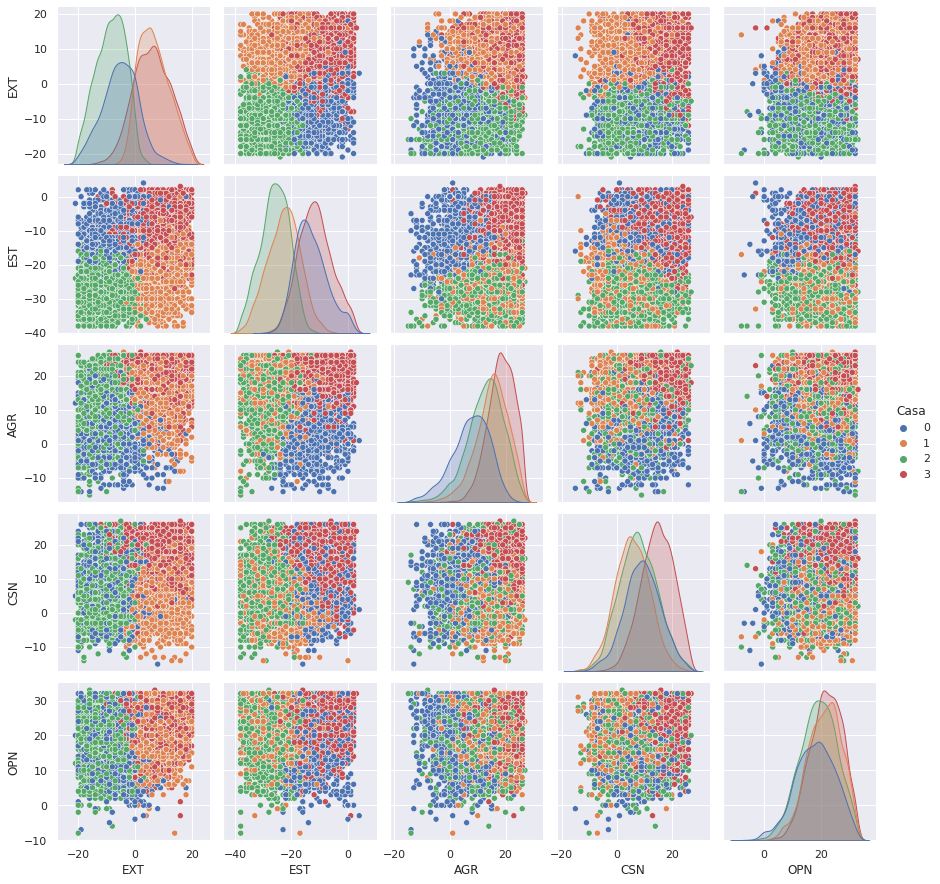

In [ ]:
lEXT = ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10']
lEST = ['EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10']
lAGR = ['AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10'] 
lCSN = ['CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10']
lOPN = ['OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']

dataResum = pd.DataFrame()
dataResum['EXT'] = fusion[lEXT].sum(axis=1) #.head(10000)
dataResum['EST'] = fusion[lEST].sum(axis=1)
dataResum['AGR'] = fusion[lAGR].sum(axis=1)
dataResum['CSN'] = fusion[lCSN].sum(axis=1)
dataResum['OPN'] = fusion[lOPN].sum(axis=1)
dataResum['Casa'] = fusion['Casa']

sns.pairplot(dataResum.head(10000), hue='Casa', palette=["C0", "C1", "C2", "C3"])
#sns.pairplot(fusion.head(100), hue='Casa', palette=["C0", "C1", "C2", "C3"])

plt.show()

In [ ]:
#############################################################
# KMEANS COM AS CARACTERÍSTICAS RESUMIDAS (PONTUAÇÃO TOTAL) #
#############################################################

big55 = dataResum[ ['EXT', 'EST', 'AGR', 'CSN', 'OPN'] ] #obs: observar o tamanho do dataResum
kmeans5param = pd.DataFrame( kmeansOBJ.fit_predict(big55) )

kmeans5param.rename(columns={0:"Casa"}, inplace=True)

big55 = pd.concat([big55, kmeans5param], axis=1)
big55

#tempo médio: 22s

#Com menos variáveis, menor tempo de execução e resultados extremamente semelhantes,
#O k-Means com as Características do BIG5 resumidas se apresenta como uma melhor 
#alternativa prática

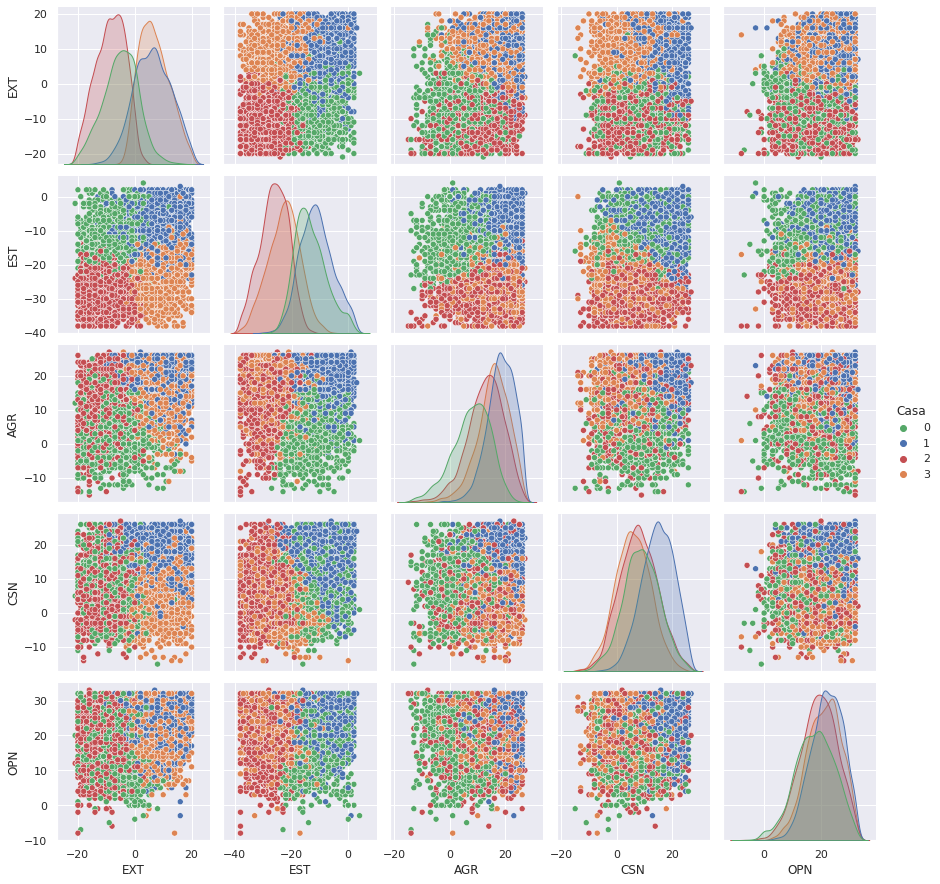

In [ ]:
sns.pairplot(big55.head(10000), hue='Casa', palette=["C2", "C0", "C3", "C1"])

plt.show()

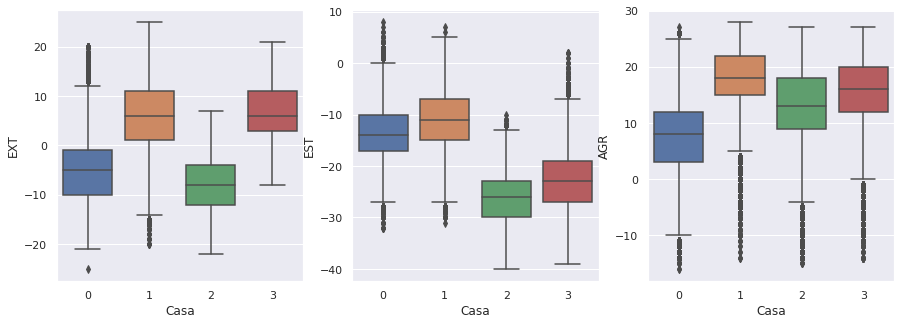

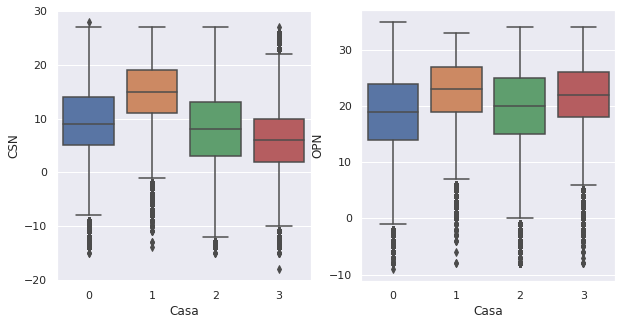

In [ ]:
sns.set(rc={"figure.figsize":( 15 , 5 )}) #para corrigir o tamanho quando há 3
fig, axes = plt.subplots(1, 3)
sns.boxplot(x=big55['Casa'], y=big55['EXT'], ax=axes[0])
sns.boxplot(x=big55['Casa'], y=big55['EST'], ax=axes[1])
sns.boxplot(x=big55['Casa'], y=big55['AGR'], ax=axes[2])
plt.show()

sns.set(rc={"figure.figsize":( 10 , 5 )}) #corrigir o tamanho para 2
fig, axes = plt.subplots(1, 2)
sns.boxplot(x=big55['Casa'], y=big55['CSN'], ax=axes[0])
sns.boxplot(x=big55['Casa'], y=big55['OPN'], ax=axes[1])
plt.show()

In [ ]:
###########################################################
# KMEANS COM CARACTERÍSTICAS RESUMIDAS E PESOS ATRIBUÍDOS #
###########################################################

#Inserindo pesos nas características resumidas
#Isto para tentar melhorar a divisão nas características
#de OPN e AGR

big5p = dataResum[ ['EXT', 'EST', 'AGR', 'CSN', 'OPN'] ]

pd.options.mode.chained_assignment = None #desactive warning mensage: A value is trying to be set on a copy of a slice from a DataFrame.

#pesos/weigts (quanto maior o número, menor o inpacto, teoricamente)
big5p['EXT'] *= 1
big5p['EST'] *= 1
big5p['AGR'] *= 1
big5p['CSN'] *= 1
big5p['OPN'] *= 1

kmeansWeigtP = pd.DataFrame( kmeansOBJ.fit_predict(big5p) )
kmeansWeigtP.rename(columns={0:"Casa"}, inplace=True)

big5p = pd.concat([big5p, kmeansWeigtP], axis=1)
#big5p

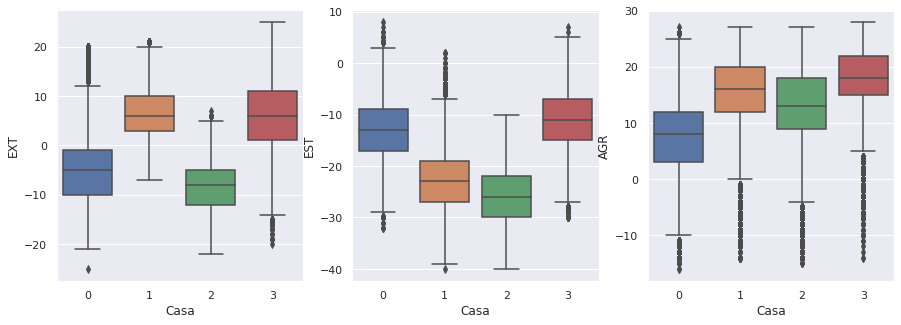

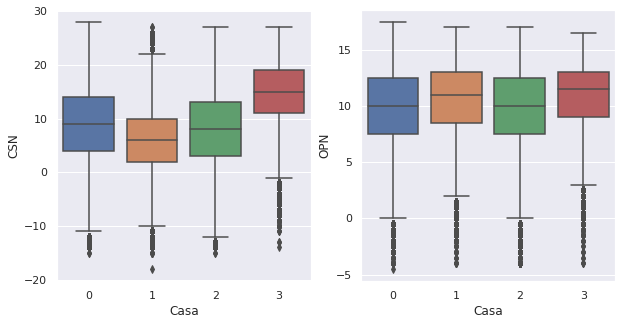

In [ ]:
sns.set(rc={"figure.figsize":( 15 , 5 )}) #para corrigir o tamanho quando há 3
fig, axes = plt.subplots(1, 3)
sns.boxplot(x=big5p['Casa'], y=big5p['EXT'], ax=axes[0])
sns.boxplot(x=big5p['Casa'], y=big5p['EST'], ax=axes[1])
sns.boxplot(x=big5p['Casa'], y=big5p['AGR'], ax=axes[2])
plt.show()

sns.set(rc={"figure.figsize":( 10 , 5 )}) #corrigir o tamanho para 2
fig, axes = plt.subplots(1, 2)
sns.boxplot(x=big5p['Casa'], y=big5p['CSN'], ax=axes[0])
sns.boxplot(x=big5p['Casa'], y=big5p['OPN'], ax=axes[1])
plt.show()

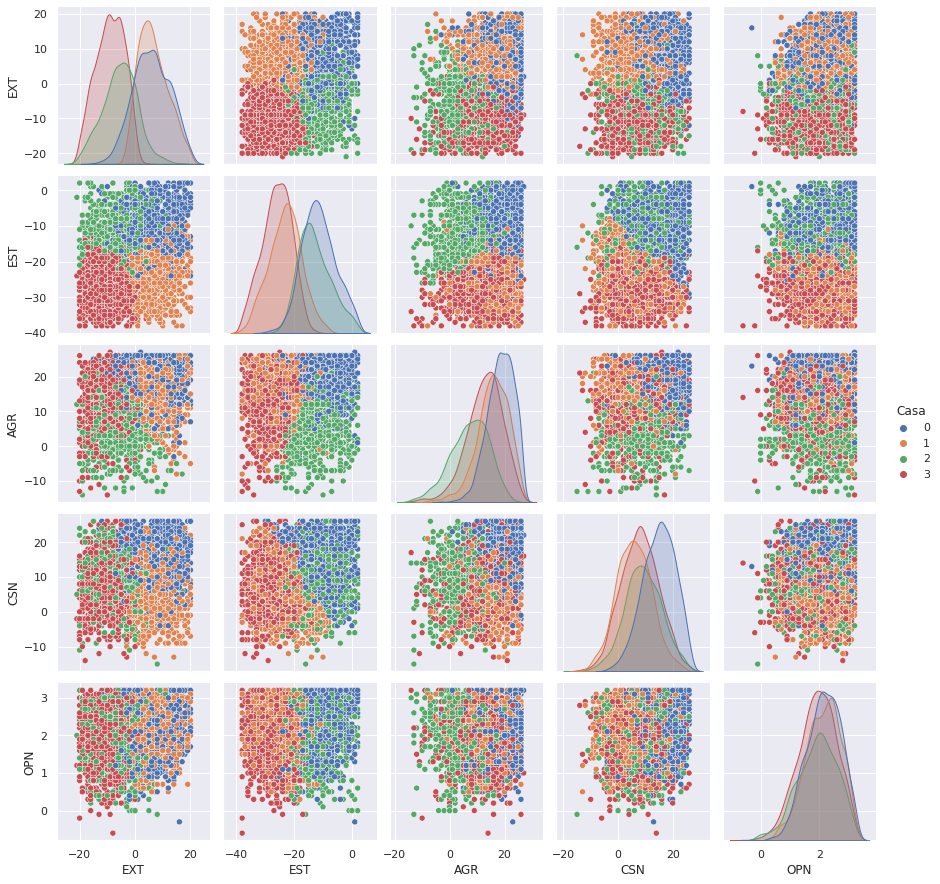

In [72]:
sns.pairplot(big5p.head(5000), hue='Casa', palette=["C0", "C1", "C2", "C3"])

plt.show()

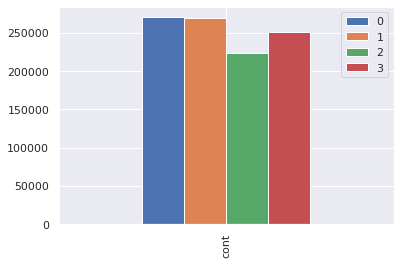

     cont
0  270708
1  269852
2  223579
3  251202


In [ ]:
#Distribuição continua balanceda com os pesos? 
temp = pd.DataFrame({'cont':Counter(big5p['Casa'])} )
temp.T.plot(kind='bar')
plt.show()

print(temp)

In [ ]:
###################################################################
# ATRIBUIÇÃO DE PONTUAÇÃO ÀS CARACTERÍSTICAS INDIVIDUAIS (SEM IA) #
###################################################################

